## Predicting heart disease Using Machine Learning 
* This notebook looks into using various python-base ML and data science libraries in an attempt to build a Machine Learning Model 
Capable of predicting whether or not someone has heart-disease or not 
We are going to take the following apporach
1. Problem defnition 
2. Data
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation

## In a statement 
Given clinical parameter about a patient can we predict or not they have heart disease or not 
# Data 
Data come from (leaveland) from UCI ML reporting 

# Evaluation 
If we can reach 95% accuracy at predicting whether a paitent have heart disease or not

## Preparing the tools
We aregoing to use pandas,Matplotlib,scikit-learn and numpy for data analysis and manipulation
## Important tools we needs 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We want to plot our inside the notebook
%matplotlib inline
# Model from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Model Evaluation 
from sklearn.model_selection import train_test_split as ttt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import precision_score,recall_score,f1_score

In [4]:
# Import the data 
df=pd.read_csv("6.1 heart-disease.csv")
df.shape

(303, 14)

# Data Exploration(Exploratory Data Analysis or EDA)
The goal is to find out more about the data and become you are working with
1. What question we try to solve 
2. what kindof do we have and how do we treat different types?
3. whats missing from the data how we deal with
4. Where are the outliers and why should you care about them 
5. How can you add change or remove features to get more out of your data

In [5]:
# Let's how many of each class there 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

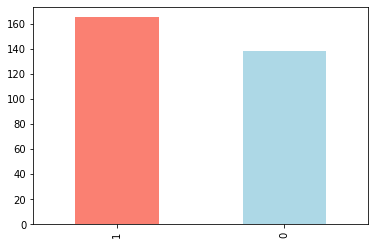

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Heart disease frequency according to sex
df.sex.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64>

In [11]:
# Compare the sex column with target column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


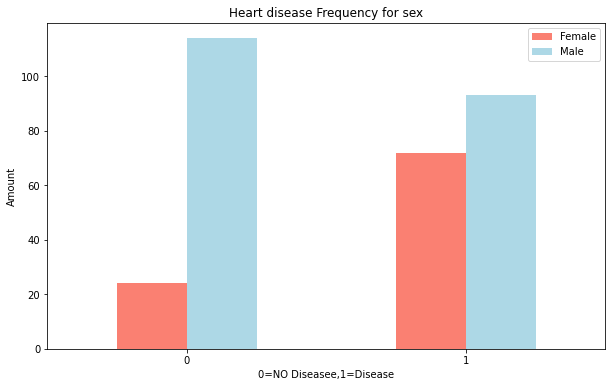

In [12]:
# Create a plot of crosstab 
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart disease Frequency for sex")
plt.xlabel("0=NO Diseasee,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

<ipython-input-13-b93b6e6ade2a>:12: UserWarning: Legend does not support 'D' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Disease","NO Disease");
<ipython-input-13-b93b6e6ade2a>:12: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Disease","NO Disease");
<ipython-input-13-b93b6e6ade2a>:12: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Disease","NO Disease");
<ipython-input-13-b93b6e6ade2a>:12: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://ma

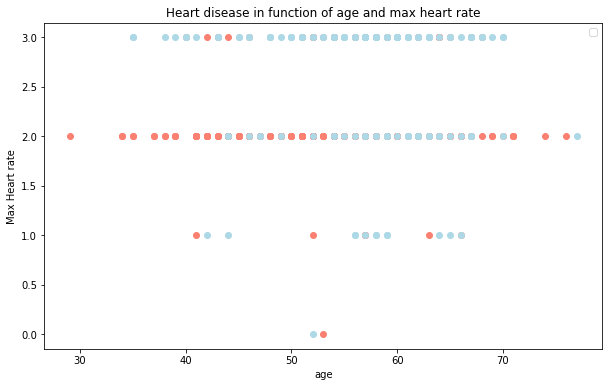

In [13]:
## Age vs Max Heart rate for heart disease 
# Create another figure
plt.figure(figsize=(10,6))
# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thal[df.target==1],c="salmon");
# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thal[df.target==0],c="lightblue");
# Add some helpful info
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("Max Heart rate")
plt.legend("Disease","NO Disease");

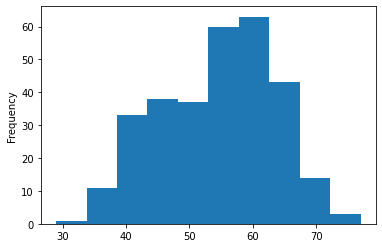

In [14]:
df.age.plot.hist();

In [15]:
## Heart Disease Frequency Per chest column pain type 
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


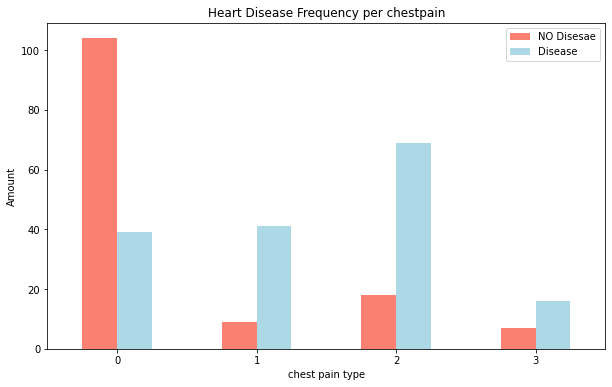

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
# ADD some more communication 
plt.title("Heart Disease Frequency per chestpain")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["NO Disesae","Disease"])
plt.xticks(rotation=0);

In [17]:
# make a Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


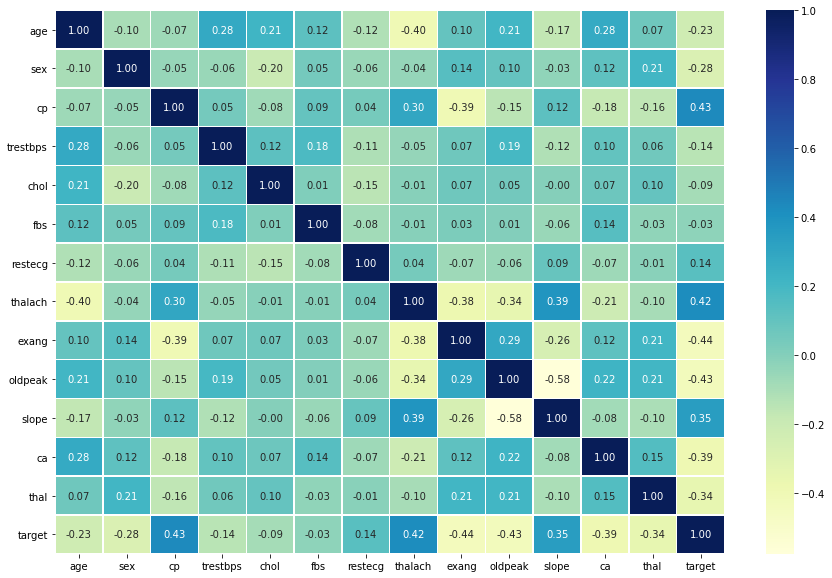

In [18]:
# Let's make our corelation matrix pattern
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu");

In [19]:
# Modelling 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#Split in to X and Y
X=df.drop("target",axis=1)
Y=df["target"]

In [21]:
#Split in to train And test sets
np.random.seed(42)
#Split in to Train and test
X_train,X_test,Y_train,Y_test=ttt(X,Y,test_size=0.2)

In [22]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [23]:
Y_train,len(Y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we have got our data in to training and test sets ,its time to Machine Learning model

We will train it (find the patterns) om training test and we'll wait (use the pattern) on test We are going to try 3 different ML models
1. Logistic Regression 
2. K-Nearest Neighbours Classifier 
3. Random Forest Classifier

In [24]:
# Put models in dictionary
models={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}

In [25]:
# create a function to fit and score models 
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    Fits and evaluate given ML models a dict of different Scikit-Learn ML models
    X_train:training data(no labels)
    X_test:testing data(no labels)
    Y_train:training labels
    Y_test:testing labels
    """
    # Set random seed 
    np.random.seed(42)
    # Make dictionary to keep model score 
    model_scores={}
    # Loop through models
    for name,model in models.items():
        #fit the model to the data
        model.fit(X_train,Y_train)
        # Evaluate the model and append its score to the model_scores 
        model_scores[name]=model.fit(X_test,Y_test)
    return model_scores

In [26]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)

C:\Users\super\Documents\machine_learning_project\project_3\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\super\Documents\machine_learning_project\project_3\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

In [27]:
# model Comparision
#model_compare=pd.DataFrame(model_scores,index=["accuracy"])
#model_compare.T.plot.bar()

Now we have got a baseline model and we know a model first predictions are not always what should be base our next steps
off.What We do?
Let's look at the following
* Hyperparameter tunning
* future Importance
* confusion_matrix
* cross_validation
* Precision
* Recall
* Classification report 
* ROC curve 
* Area Under Curve

## Hyperparameter Tunning

In [28]:
# Let's tune KNN
train_scores=[]
test_scores=[]
# Create a list for different n_neighbors
neighbors=range(1,21)
#Set up KNN instance
knn=KNeighborsClassifier()
# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(X_train,Y_train)
    # Update the training score list
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data 75.409836%


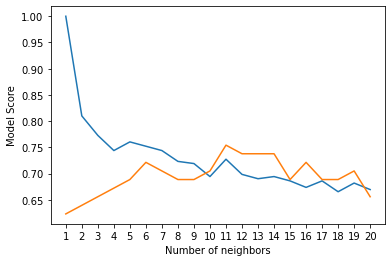

In [31]:
plt.plot(neighbors,train_scores,label="Train Scores");
plt.plot(neighbors,test_scores,label="Test Scores");
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend
plt.xticks(np.arange(1,21,1))
print(f"Maximum KNN score on the test data {max(test_scores)*100.:2f}%");

# Hyper parameter tunning with RandomizedSearchCv
we are going to tune 
* Logistic Regression()
* RandomForestClassifier()

...Using RandomizedSearchCv

In [32]:
#Create a hyperparameter grid for logistic regression
log_reg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid={"max_depth":[None,3,5,10],
       "min_samples_split":np.arange(2,20,2),
       "min_samples_leaf":np.arange(1,20,2),
         "n_estimators":np.arange(10,1000,50)
       }

In [33]:
# Now we have got hyperparameters grids setup for each of our model let's tune them using RandomizedSearchCV
# Tune LogisticRegression()
np.random.seed(42)
# Setup Random Hyperparameter search for LogisticRegression()
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

In [34]:
# Fit Hyperparameter Search For LOgisticRegression 
rs_log_reg.fit(X_train,Y_train)
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
#Set up Random Hyperparameters search for RandomForestClassifier()
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
# Fit Random Hyperparameter Search for RandomForestClassifier()
rs_rf.fit(X_train,Y_train)
# Find the best parameters
rs_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.4min finished


{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [36]:
# Evaluate the RandomForestClassifier()
rs_rf.score(X_test,Y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV 
Since LogisticRegression modelprovides best score so far ,we will try to improve them with GridSearchCV

In [40]:
# Different Hyperparameter for our LOgisticRegression model
log_reg_grid={
    "C" : np.logspace(-4,4,30),
    "solver" : ["liblinear"] 
}
# Set up Grid hyperparameter Search for LOgisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
#fit grid Hyperparameter Search model
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
#Check the best Hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
# Evaluate the Grid Search Logistic Regression model
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

## Evaluting our tuned ML Classifier, beyond accuracy
* ROC curve and AOC curve 
* COnfusion_matrix
* Classification report
* Precision
* Recall 
* f1_score

And it would be great if cross_validation was used where possible,first we need to make predictions 


In [43]:
# make predictions with tuned model 
Y_preds=gs_log_reg.predict(X_test)
Y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

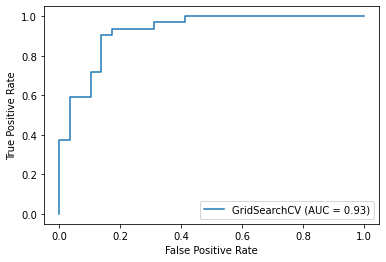

In [49]:
# Import ROC curve and calculate And AUC metric 
from sklearn.metrics import plot_roc_curve
# Plot ROC curve and calculate and AUC metric
plot_roc_curve(gs_log_reg,X_test,Y_test);

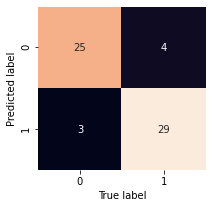

In [50]:
# Confusion Matrix
def plot_conf_mat(Y_test,Y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's matrix
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,Y_preds),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(Y_test,Y_preds)

Now we have got ROC curve, an AUC matrix and confusion matrix let's get a classification report as well as cross_validated precision recall,f1_score

In [51]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation matrix using cross_validation
We are going to calculate accurcy,precision,recall,f1_score of our model using cross_validation and to do so well be using "cross_val_score()"

In [52]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
#Create a new Classifier with a best params
clf=LogisticRegression(C= 0.20433597178569418, solver='liblinear')

In [55]:
# Cross Validated accuracy
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [57]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [60]:
# Cross Validated Precision
cv_precision=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [61]:
cv_precision=np.mean(cv_acc)
cv_precision

0.8207936507936507

In [62]:
cv_recall=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [64]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [66]:
cv_f1=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [67]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

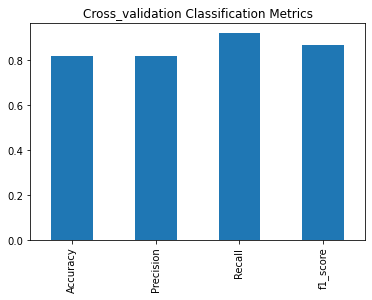

In [73]:
cv_metrics=pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "f1_score":cv_f1
},index=[0])
cv_metrics.T.plot.bar(title="Cross_validation Classification Metrics",legend=False);

# Feature Importance 
feature importance is another as asking which features contributed most to outcomes of the model and how did they contributed?
Finding features importance for each ML model

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


let's find feature importance for our Logistic Regression model

In [75]:
# fit an instance of logistic Regression 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [77]:
clf=LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(X_train,Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [79]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

<AxesSubplot:title={'center':'Feature Importance'}>

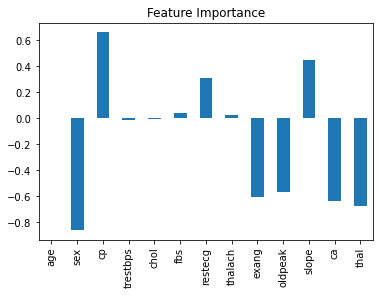

In [82]:
# Visualize feature importance 
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [83]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [84]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


=> Experimentation
If you have not hit your evaluation metric yet ask Yourself...
* Could we get more data
* could we try a better model?like carboost and Xboost
* Could we improve the current model ? (beyond what we have done so far)
* If your model is good enough (you have hit your evaluation metric how would you export it and share it to others)